# 1. Project : Machine Learning for Health Claim Prediction

## 1.1 วัตถุประสงค์ของโปรเจค

    💚 วัตถุประสงค์หลักของการทำ Health Insurance Claim Prediction แบบ Sepervised Learninig Regression 
    คือ การสร้างโมเดลที่สามารถทำนายประกันสุขภาพของผู้ถือกรมธรรม์ว่าจะมีการใช้ประมาณเท่าไหร่ต่อรอบกรมธรรม์

# 2. Importing Libraries

## 1.2 Data Definition

In [1]:
!pip install -U imbalanced-learn

In [2]:
!pip  install missingno

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mso

import warnings 
warnings.filterwarnings("ignore")

In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [5]:
# For Models
from sklearn.model_selection import train_test_split, KFold , cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# For Evaluation 
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# 3. Reading Dataset

In [6]:
df = pd.read_csv(r"C:\Users\muent\Desktop\my project for data analyst\Project-14_Health_Insurance_Claim_Prediction\Health_Insurance_Dataset\Health_Insurance_Dataset.csv")

In [7]:
df

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,male,49,28.3,NoDisease,1,1,Florence,54,1,0,FilmMaker,21082.2
14996,39.0,male,74,29.6,NoDisease,4,0,Miami,64,1,0,Student,7512.3
14997,20.0,male,62,33.3,NoDisease,0,0,Tampa,52,1,0,FashionDesigner,1391.5
14998,52.0,male,88,36.7,NoDisease,0,0,PanamaCity,70,1,0,Farmer,9144.6


### Variables :

1. age : อายุผู้ถือกรมธรรม์ (Numeric)
2. sex: เพศผู้ถือกรมธรรม์ (Categoric)
3. weight: น้ำหนักตัว (Numeric)
4. bmi: ดัชนีมวลกาย (Numeric)
5. hereditary_diseases: โรคประจำตัว (Categoric)
6. no_of_dependents: จำนวนผู้อยู่ในอุปการะของผู้ถือกรมธรรม์ (Numeric)
7. smoker: การสูบบุหรี่ (non-smoker=0;smoker=1) (Categoric)
8. city: เมืองที่อาศัย (Categoric)
9. bloodpressure: ความดันโลหิต (Numeric)
10. diabetes: โรคเบาหวาน (non-diabetic=0; diabetic=1) (Categoric)
11. regular_ex: การออกกำลังกาย (no-excercise=0; excercise=1) (Categoric)
12. job_title: อาชีพ (Categoric)
13. claim: จำนวนเงินเรียกร้องค่าสินไหมประกันสุขภาพ (Numeric)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [9]:
df.columns

Index(['age', 'sex', 'weight', 'bmi', 'hereditary_diseases',
       'no_of_dependents', 'smoker', 'city', 'bloodpressure', 'diabetes',
       'regular_ex', 'job_title', 'claim'],
      dtype='object')

# 4. Data Exploration(EDA)

**ตัวแปรประเภทหมวดหมู่ (Categorical Variable)**
- ได้แก่ sex, hereditary_diseases, city, job_title, smoker, diabetes, regular_ex 

**ตัวแปรประเภทตัวเลข (Numerical Variable)**
- ได้แก่ age, weight, bmi, no_of_dependents, bloodpressure, claim

## 4.1 Categorical Variable

### 4.1.1 Sex

In [10]:
df.sex.value_counts(dropna= False)

female    7652
male      7348
Name: sex, dtype: int64

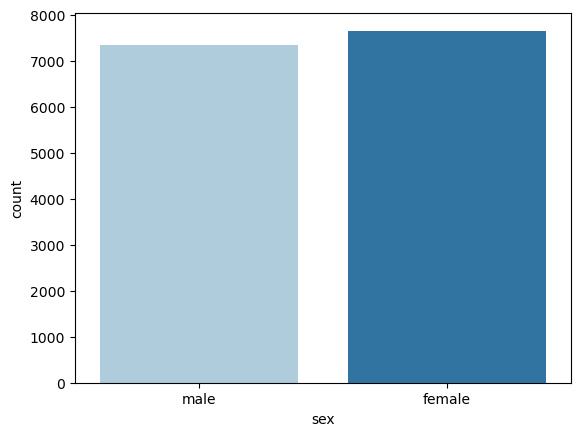

In [11]:
sns.countplot(data = df , x = "sex", palette= "Paired")
plt.show()

In [12]:
countMale = len(df[df.sex == "male"])
countFemale = len(df[df.sex == "female"])
countNull = len(df[df.sex.isnull()])

print("Percantage of Male policyholder  : {:.2f}%".format(countMale*100/len(df.sex)))
print("Percantage of Female policyholder  : {:.2f}%".format(countFemale*100/len(df.sex)))
print("Missing values percentage: {:.2f}%".format(countNull*100/len(df.sex)))

Percantage of Male policyholder  : 48.99%
Percantage of Female policyholder  : 51.01%
Missing values percentage: 0.00%


    💚 จำนวนผู้ถือกรมธรรม์เพศหญิงสูงกว่าเพศชาย
    ✅ ในคอลัมน์นี้ไม่มี Missing Value 

### 4.1.2 Hereditary_diseases

In [13]:
df.hereditary_diseases.value_counts(dropna= False)

NoDisease       13998
Diabetes          148
Alzheimer         144
Obesity           136
EyeDisease        123
Cancer            109
Arthritis          96
HeartDisease       93
Epilepsy           84
High BP            69
Name: hereditary_diseases, dtype: int64

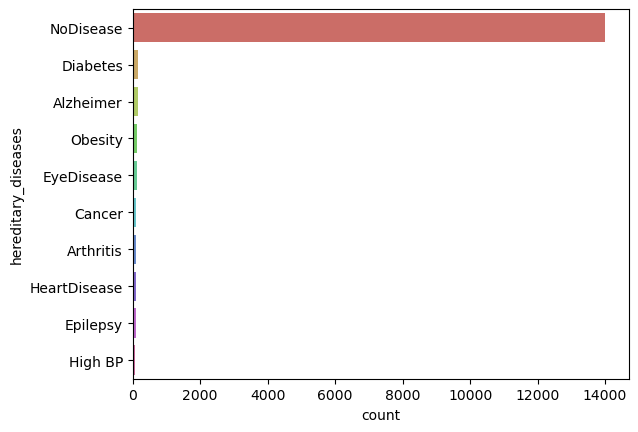

In [14]:
sns.countplot(data = df , y = "hereditary_diseases", palette= "hls", order=df['hereditary_diseases'].value_counts().index )
plt.show()

In [15]:
df.hereditary_diseases.unique()

array(['NoDisease', 'Epilepsy', 'EyeDisease', 'Alzheimer', 'Arthritis',
       'HeartDisease', 'Diabetes', 'Cancer', 'High BP', 'Obesity'],
      dtype=object)

In [16]:
countNoDisease = len(df[df.hereditary_diseases == "NoDisease"])
countDiabetes = len(df[df.hereditary_diseases == "Diabetes"])
countAlzheimer = len(df[df.hereditary_diseases == "Alzheimer"])
countObesity = len(df[df.hereditary_diseases == "Obesity"])
countEyeDisease = len(df[df.hereditary_diseases == "EyeDisease"])
countCancer = len(df[df.hereditary_diseases == "Cancer"])
countArthritis = len(df[df.hereditary_diseases == "Arthritis"])
countHeartDisease = len(df[df.hereditary_diseases == "HeartDisease"])
countEpilepsy = len(df[df.hereditary_diseases == "Epilepsy"])
countHighBP = len(df[df.hereditary_diseases == "High BP"])
countNull = len(df[df.hereditary_diseases.isnull()])

print("Percantage of NoDisease  : {:.2f}%".format(countNoDisease*100/len(df.hereditary_diseases)))
print("Percantage of Diabetes  : {:.2f}%".format(countDiabetes*100/len(df.hereditary_diseases)))
print("Percantage of Alzheimer  : {:.2f}%".format(countAlzheimer*100/len(df.hereditary_diseases)))
print("Percantage of Obesity  : {:.2f}%".format(countObesity*100/len(df.hereditary_diseases)))
print("Percantage of EyeDisease  : {:.2f}%".format(countEyeDisease *100/len(df.hereditary_diseases)))
print("Percantage of Cancer  : {:.2f}%".format(countCancer*100/len(df.hereditary_diseases)))
print("Percantage of Arthritis  : {:.2f}%".format(countArthritis*100/len(df.hereditary_diseases)))
print("Percantage of HeartDisease  : {:.2f}%".format(countHeartDisease*100/len(df.hereditary_diseases)))
print("Percantage of Epilepsy  : {:.2f}%".format(countEpilepsy*100/len(df.hereditary_diseases)))
print("Percantage of High BP  : {:.2f}%".format(countHighBP*100/len(df.hereditary_diseases)))
print("Missing values percentage: {:.2f}%".format(countNull*100/len(df.hereditary_diseases)))

Percantage of NoDisease  : 93.32%
Percantage of Diabetes  : 0.99%
Percantage of Alzheimer  : 0.96%
Percantage of Obesity  : 0.91%
Percantage of EyeDisease  : 0.82%
Percantage of Cancer  : 0.73%
Percantage of Arthritis  : 0.64%
Percantage of HeartDisease  : 0.62%
Percantage of Epilepsy  : 0.56%
Percantage of High BP  : 0.46%
Missing values percentage: 0.00%


    💚 จำนวนผู้ถือกรมธรรม์ส่วนมากไม่มีโรคประจำตัว
    ✅ ในคอลัมน์นี้ไม่มี Missing Value 

### 4.1.3 Smoker

In [17]:
df.smoker.value_counts(dropna= False)

0    12028
1     2972
Name: smoker, dtype: int64

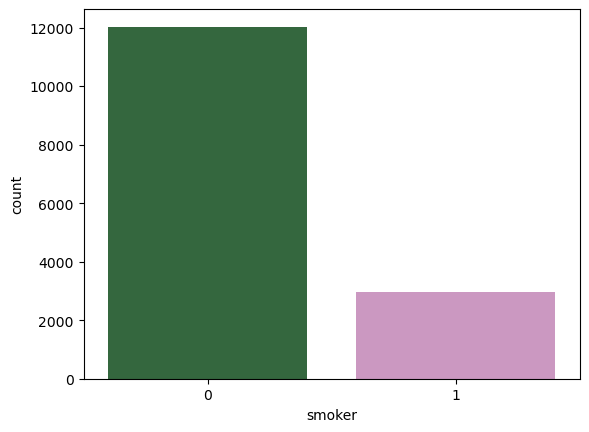

In [18]:
sns.countplot(data = df , x = "smoker", palette= "cubehelix")
plt.show()

In [19]:
df.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                   int64
city                    object
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
claim                  float64
dtype: object

In [20]:
countNoSmoker= len(df[df.smoker == 0])
countSmoker = len(df[df.smoker == 1])
countNull = len(df[df.smoker.isnull()])

print("Percantage of No Smoker  : {:.2f}%".format(countNoSmoker*100/len(df.smoker)))
print("Percantage of Smoker  : {:.2f}%".format(countSmoker*100/len(df.smoker)))
print("Missing values percentage: {:.2f}%".format(countNull*100/len(df.smoker)))

Percantage of No Smoker  : 80.19%
Percantage of Smoker  : 19.81%
Missing values percentage: 0.00%


    💚 จำนวนผู้ถือกรมธรรม์ส่วนมากไม่สูบบุหรี่
    ✅ ในคอลัมน์นี้ไม่มี Missing Value 

### 4.1.4 City

In [21]:
df.city.value_counts(dropna=False)

NewOrleans    302
Nashville     302
Charleston    298
Brimingham    298
Memphis       297
             ... 
Warwick        69
Trenton        69
York           69
Baltimore      69
Syracuse       69
Name: city, Length: 91, dtype: int64

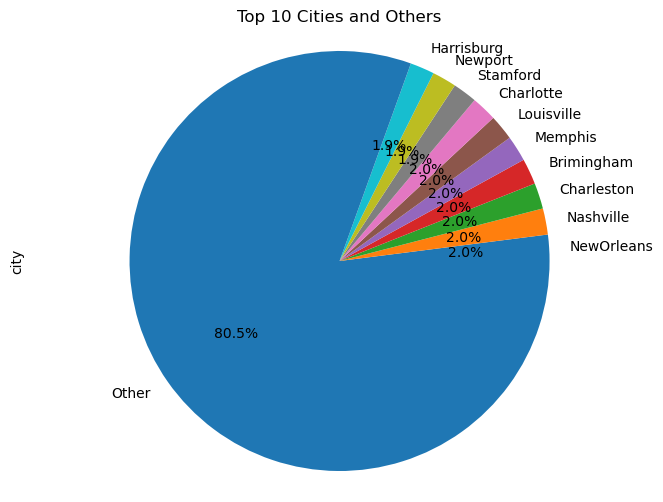

In [22]:
city_counts = df['city'].value_counts()

# 10 เมืองที่มีผู้ถือกรมธรรม์ส่วนมาก
top_cities = city_counts.head(10)

# รวมส่วนที่เหลือเป็น 'Other'
other = city_counts.sum() - top_cities.sum()
top_cities['Other'] = other

# สร้าง pie chart
plt.figure(figsize=(8, 6))
top_cities.plot.pie(autopct='%1.1f%%')
plt.axis('equal')  # ทำให้ pie chart เป็นวงกลม
plt.title('Top 10 Cities and Others')
plt.show()

    💚 แสดงเมืองที่ผู้ถือกรมธรรม์อยู่อาศัย
    ✅ ในคอลัมน์นี้ไม่มี Missing Value 

### 4.1.5 diabetes

In [23]:
df.diabetes.value_counts(dropna= False)

# 0 Non diabetic
# 1 Diabetic

1    11655
0     3345
Name: diabetes, dtype: int64

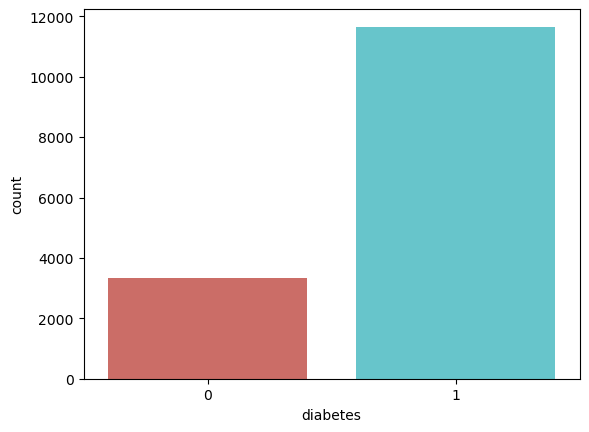

In [24]:
sns.countplot(data = df , x = "diabetes", palette= "hls")
plt.show()

In [25]:
countNoDiabete= len(df[df.diabetes == 0])
countDiabete = len(df[df.diabetes == 1])
countNull = len(df[df.diabetes.isnull()])

print("Percantage of No Diabete  : {:.2f}%".format(countNoDiabete*100/len(df.diabetes)))
print("Percantage of Diabete  : {:.2f}%".format(countDiabete*100/len(df.diabetes)))
print("Missing values percentage: {:.2f}%".format(countNull*100/len(df.diabetes)))

Percantage of No Diabete  : 22.30%
Percantage of Diabete  : 77.70%
Missing values percentage: 0.00%


    💚 ผู้ถือกรมธรรม์เป็นโรคเบาหวานสูงกว่าผู้ที่ไม่เป็นโรคเบาหวาน
    ✅ ในคอลัมน์นี้ไม่มี Missing Value 

### 4.1.6 Regular Exercise

In [26]:
df.regular_ex.value_counts(dropna= False)

# 0 No Exercise
# 1 Exercise

0    11638
1     3362
Name: regular_ex, dtype: int64

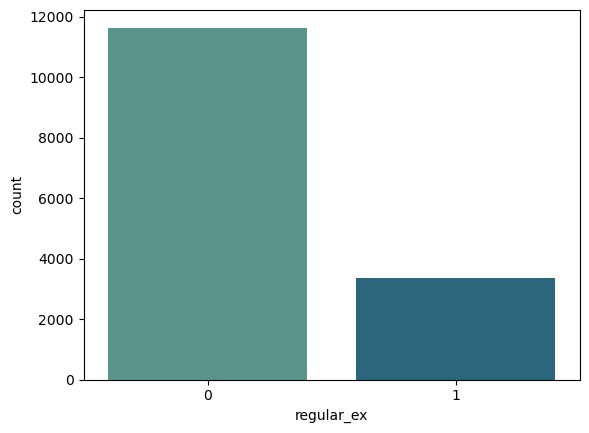

In [27]:
sns.countplot(data = df , x = "regular_ex", palette= "crest")
plt.show()

In [28]:
countNoExercise= len(df[df.regular_ex == 0])
countExercise = len(df[df.regular_ex == 1])
countNull = len(df[df.regular_ex.isnull()])

print("Percantage of No Exercise : {:.2f}%".format(countNoExercise*100/len(df.regular_ex)))
print("Percantage of Exercise  : {:.2f}%".format(countExercise*100/len(df.regular_ex)))
print("Missing values percentage: {:.2f}%".format(countNull*100/len(df.regular_ex)))

Percantage of No Exercise : 77.59%
Percantage of Exercise  : 22.41%
Missing values percentage: 0.00%


    💚 ผู้ถือกรมธรรม์ไม่ชอบออกกำลังกายมีจำนวนสูงกว่าผู้ที่ออกกำลังกาย
    ✅ ในคอลัมน์นี้ไม่มี Missing Value 

### 4.1.7 Job Title

In [29]:
df.job_title.value_counts(dropna= False) 

Student              1320
HomeMakers            972
Singer                744
Actor                 720
FilmMaker             714
Dancer                693
HouseKeeper           667
Manager               602
Police                412
Photographer          400
Beautician            385
CEO                   384
Engineer              374
FashionDesigner       371
Politician            370
Accountant            368
Clerks                367
Architect             365
ITProfessional        348
DataScientist         335
Lawyer                309
Academician           306
Doctor                294
DefencePersonnels     292
Technician            283
Chef                  281
FilmDirector          281
Blogger               281
Journalist            275
CA                    272
Farmer                258
Analyst               255
GovEmployee           250
Buisnessman           242
Labourer              210
Name: job_title, dtype: int64

In [30]:
countNull = len(df[df.job_title.isnull()])
print("Missing values percentage: {:.2f}%".format(countNull*100/len(df.job_title)))

Missing values percentage: 0.00%


    💚  แสดงอาชีพของผู้ถือกรมธรรม์
    ✅ ในคอลัมน์นี้ไม่มี Missing Value 

## 4.2 Numerical Variable

**ตัวแปรประเภทตัวเลข (Numerical Variable)**
- ได้แก่ age, weight, bmi, no_of_dependents, bloodpressure, claim

### 4.2.1 Describe Numerical Variable (สถิติเบื้องต้น)

In [31]:
df

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,male,49,28.3,NoDisease,1,1,Florence,54,1,0,FilmMaker,21082.2
14996,39.0,male,74,29.6,NoDisease,4,0,Miami,64,1,0,Student,7512.3
14997,20.0,male,62,33.3,NoDisease,0,0,Tampa,52,1,0,FashionDesigner,1391.5
14998,52.0,male,88,36.7,NoDisease,0,0,PanamaCity,70,1,0,Farmer,9144.6


In [32]:
df[["age", "weight", "bmi", "no_of_dependents", "bloodpressure", "claim"]].describe()

,age,weight,bmi,no_of_dependents,bloodpressure,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,68.650133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,19.418515,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,64.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,71.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,80.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,122.000000,63770.400000


### 4.2.2 Distribution of Numerical Variable

💚🧡 จะพล็อตกราฟ Histogram  และ Box plot เพื่อพิจารณาการกระจายตัวและ ดู outlier

#### 4.2.2.1 Histogram Distribution 💚💛 กราฟแสดงการกระจายตัวของตัวแปรประเภท numerical variable

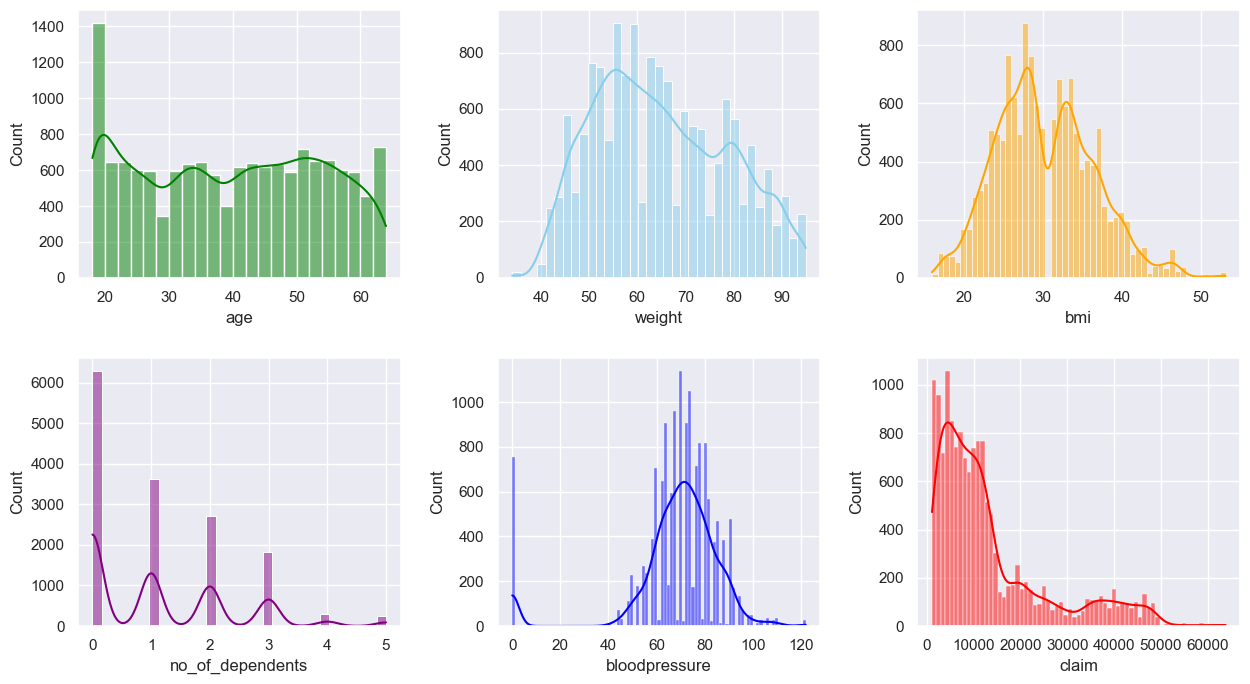

In [33]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 3, figsize=(15, 8), sharex=False)  # sharex=False เพื่อไม่ให้แกน x ของแต่ละกราฟเชื่อมโยงกัน

sns.histplot(data=df, x="age", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="weight", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="bmi", kde=True, ax=axs[0, 2], color='orange')
sns.histplot(data=df, x="no_of_dependents", kde=True, ax=axs[1, 0], color='purple')
sns.histplot(data=df, x="bloodpressure", kde=True, ax=axs[1, 1], color='blue')
sns.histplot(data=df, x="claim", kde=True, ax=axs[1, 2], color='red')

# ปรับช่องว่างระหว่างกราฟด้านบนและด้านล่าง
fig.subplots_adjust(hspace=0.3 ,  wspace= 0.3)  

#### 4.2.2.1 Boxplot 💚💛 กราฟแสดง outlier

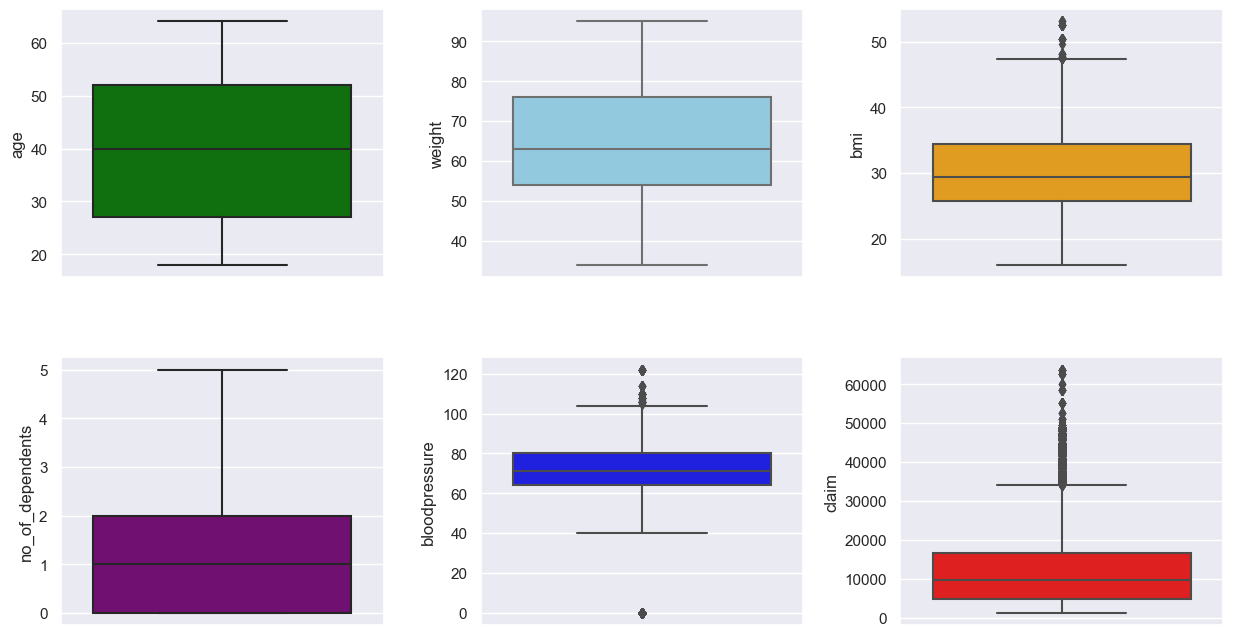

In [34]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 3, figsize=(15, 8), sharex=False)  # sharex=False เพื่อไม่ให้แกน x ของแต่ละกราฟเชื่อมโยงกัน

sns.boxplot(data=df, y="age",ax=axs[0, 0], color='green')
sns.boxplot(data=df, y="weight",  ax=axs[0, 1], color='skyblue')
sns.boxplot(data=df, y="bmi",  ax=axs[0, 2], color='orange')
sns.boxplot(data=df, y="no_of_dependents",  ax=axs[1, 0], color='purple')
sns.boxplot(data=df, y="bloodpressure", ax=axs[1, 1], color='blue')
sns.boxplot(data=df, y="claim",  ax=axs[1, 2], color='red')

# ปรับช่องว่างระหว่างกราฟด้านบนและด้านล่าง
fig.subplots_adjust(hspace=0.3 ,  wspace= 0.3)  

- การกระจายตัวของ age, weight, bmi, no_of_dependents, bloodpressure, claim เป็นแบบกราฟเบ้ 
- และ bmi, bloodpressure, claim  มีค่า outlier ด้วย 

## 4.3 Correlation (ความสัมพันธ์ของตัวแปร)

In [35]:
df[["age", "weight", "bmi", "no_of_dependents", "bloodpressure", "claim"]].corr()

,age,weight,bmi,no_of_dependents,bloodpressure,claim
age,1.000000,0.285646,0.188336,0.060436,-0.008317,0.301158
weight,0.285646,1.000000,0.251649,0.135687,-0.020835,0.077716
bmi,0.188336,0.251649,1.000000,0.051498,-0.041454,0.206588
no_of_dependents,0.060436,0.135687,0.051498,1.000000,0.024849,0.067614
bloodpressure,-0.008317,-0.020835,-0.041454,0.024849,1.000000,0.013742
claim,0.301158,0.077716,0.206588,0.067614,0.013742,1.000000


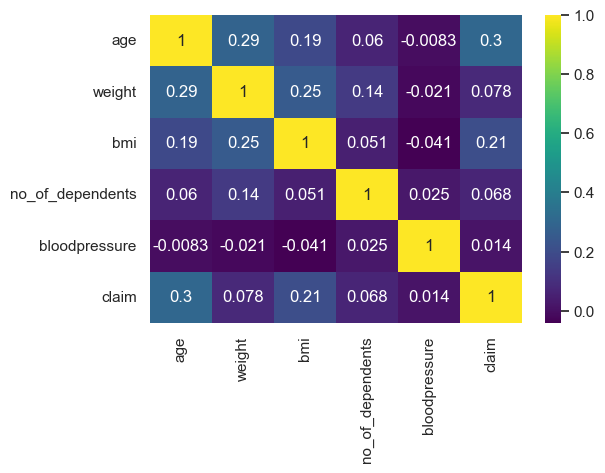

In [36]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["age", "weight", "bmi", "no_of_dependents", "bloodpressure", "claim"]].corr(), annot= True, cmap='viridis')
plt.show()

#### 💛💚🧡 ลักษณะของ Correlation ข้อมูลชุดนี้ไม่มีความสัมพันธ์แบบ Non-linear

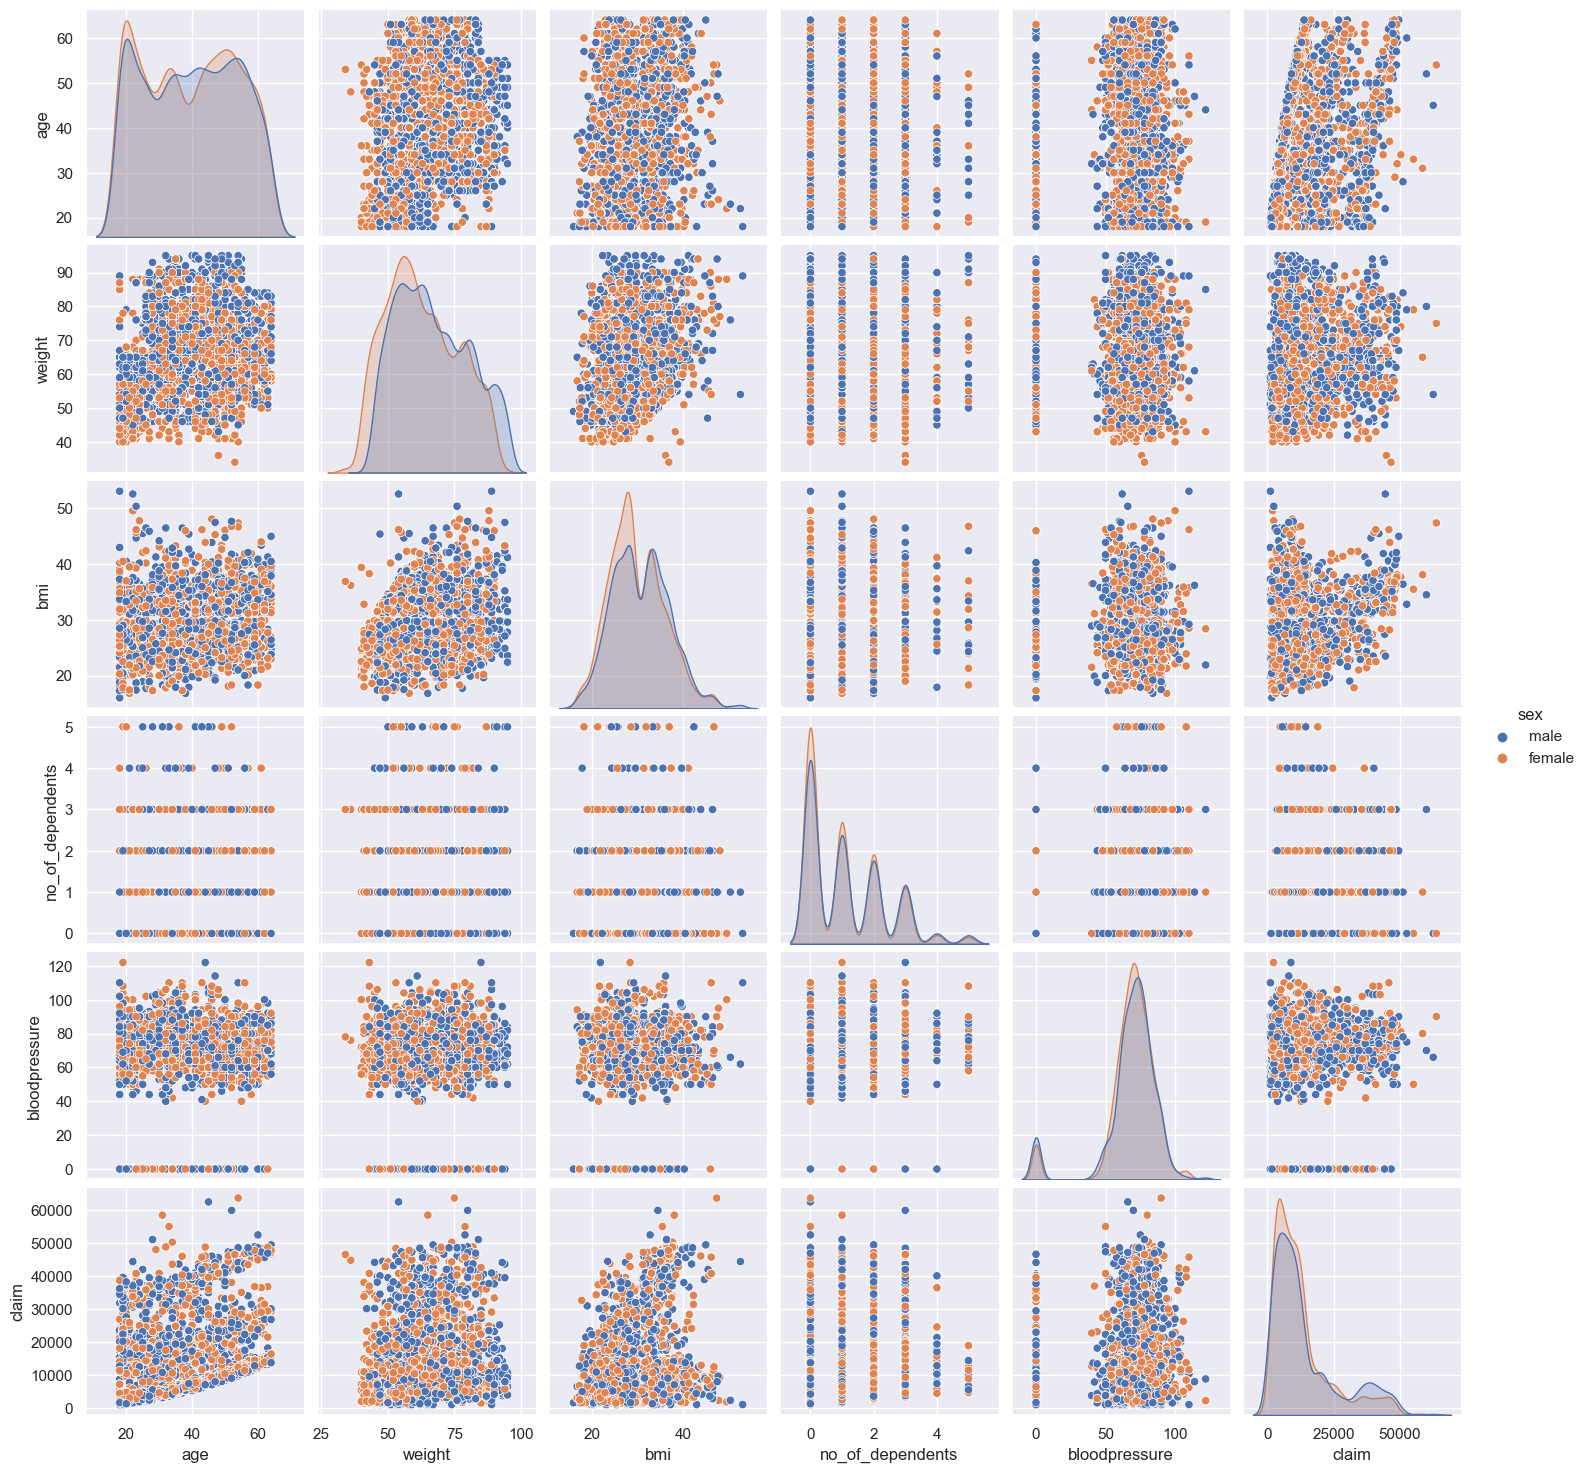

In [37]:
sns.pairplot(df, 
             vars = ["age", "weight", "bmi", "no_of_dependents", "bloodpressure", "claim"],
            hue = "sex")
plt.show()

#### 💛💚🧡 ลักษณะของ Pair Plots ข้อมูลชุดนี้เป็นความสัมพันธ์แบบ Non-linear

## 4.4 Handle missing values

In [38]:
df.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

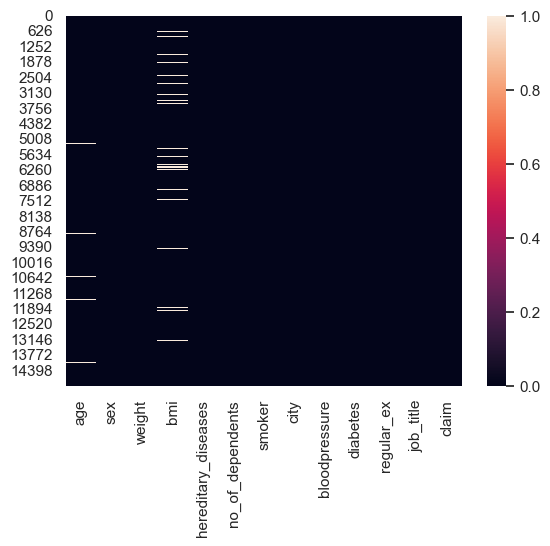

In [39]:
sns.heatmap(df.isnull())
plt.show()

    🧡 แสดงค่า null ของแต่ละตัวแปร
    🧡 age และ bmi มี missing values

# 5. Data Preprocessing

## 5.2 Data Imputation การประมาณค่าสำหรับจัดการตัวแปรที่มีค่าหายไป(Missing Values)

    💚 ตัวแปรที่มีค่าหายไป(Missing Values) คือ age และ bmi ซึ่งเป็นตัวแปรประเภท Numerical variable 
    💚 ในส่วนของตัวแปรชนิด Numerical Variables จะแทนค่าที่หายไปด้วย ค่า "mean"

In [40]:
# coumns ที่เป็น Numerical Variables   ที่มี missing values
# age และ bmi 

df.select_dtypes(include=['int64', 'float64']).isnull().sum()

age                 396
weight                0
bmi                 956
no_of_dependents      0
smoker                0
bloodpressure         0
diabetes              0
regular_ex            0
claim                 0
dtype: int64

In [41]:
df["age"].fillna(df["age"].mean(), inplace = True)
df["bmi"].fillna(df["bmi"].mean(), inplace = True)

## 5.3 One-hot Encoding

    🧡 การทำรหัส encoding สำหรับข้อมูล

In [42]:
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [43]:
df = pd.get_dummies(df, drop_first=True)

In [44]:
df

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim,sex_male,...,job_title_Journalist,job_title_Labourer,job_title_Lawyer,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician
0,60.0,64,24.3,1,0,72,0,0,13112.6,1,...,0,0,0,0,0,0,0,0,0,0
1,49.0,75,22.6,1,0,78,1,1,9567.0,0,...,0,0,0,0,0,0,0,0,0,0
2,32.0,64,17.8,2,1,88,1,1,32734.2,0,...,0,0,0,0,0,0,0,0,0,0
3,61.0,53,36.4,1,1,72,1,0,48517.6,0,...,0,0,0,0,0,0,0,0,0,0
4,19.0,50,20.6,0,0,82,1,0,1731.7,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,49,28.3,1,1,54,1,0,21082.2,1,...,0,0,0,0,0,0,0,0,0,0
14996,39.0,74,29.6,4,0,64,1,0,7512.3,1,...,0,0,0,0,0,0,0,0,1,0
14997,20.0,62,33.3,0,0,52,1,0,1391.5,1,...,0,0,0,0,0,0,0,0,0,0
14998,52.0,88,36.7,0,0,70,1,0,9144.6,1,...,0,0,0,0,0,0,0,0,0,0


## 5.4 Handle Outliers

#### 💛 จัดการค่า Outlier

    💛 ใช้วิธี Interquartile Range (IQR) : คำนวณ IQR (Q3-Q1) และกำหนดขอบเขต (Q1-1.5IQR) และ (Q3+1.5IQR)
    💛 ใช้ Clip: เพราะต้องการรักษาจำนวนข้อมูลไว้ แต่ลดผลกระทบของ Outliers

- Feature ที่มีค่า outlier คือ **bmi** ,**bloodpressure** และ **claim**

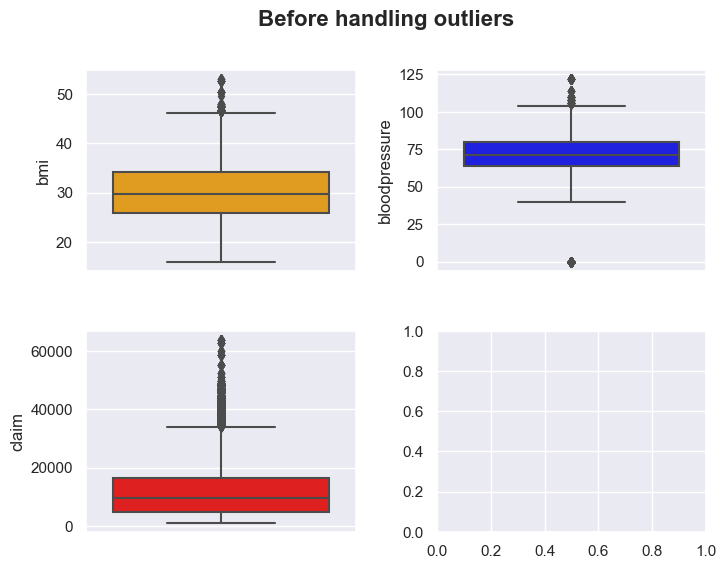

In [45]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(8, 6), sharex=False)  # sharex=False เพื่อไม่ให้แกน x ของแต่ละกราฟเชื่อมโยงกัน

sns.boxplot(data=df, y="bmi",  ax=axs[0, 0], color='orange')
sns.boxplot(data=df, y="bloodpressure", ax=axs[0, 1], color='blue')
sns.boxplot(data=df, y="claim",  ax=axs[1, 0], color='red')

fig.suptitle("Before handling outliers", fontsize=16, fontweight='bold')
fig.subplots_adjust(hspace=0.3 ,  wspace= 0.3) 

In [46]:
# คอลัมน์ที่ต้องการจัดการ outliers
columns_to_handle = ['bmi', 'bloodpressure', 'claim']

# จัดการ outliers ใน columns ที่ระบุโดยใช้ IQR
for col in columns_to_handle:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)


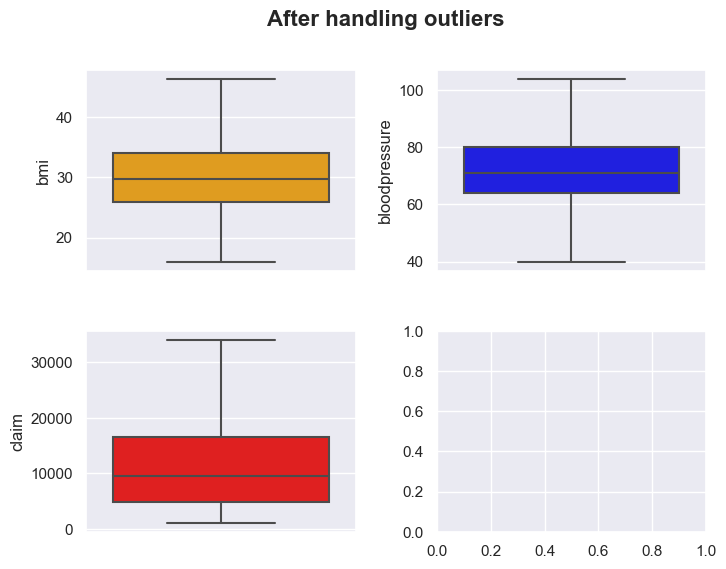

In [47]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(8, 6), sharex=False)  

sns.boxplot(data=df, y="bmi",  ax=axs[0, 0], color='orange')
sns.boxplot(data=df, y="bloodpressure", ax=axs[0, 1], color='blue')
sns.boxplot(data=df, y="claim",  ax=axs[1, 0], color='red')

fig.suptitle("After handling outliers", fontsize=16, fontweight='bold')
fig.subplots_adjust(hspace=0.3 ,  wspace= 0.3) 

## 5.5 Skewed Distribution Treatment

##### 💛💚 เพื่อทำให้กราฟเบ้ขวาให้ใกล้เคียงการกระจายตัวแบบ normalized  distribution
- การจัดการกับการกระจายตัวของข้อมูลที่เบ้ (Skewed Distribution) ด้วยวิธี Square Root Transformation
- เป็นหนึ่งในเทคนิคที่ใช้กันบ่อยในการปรับรูปแบบของข้อมูลให้ใกล้เคียงกับการแจกแจงแบบปกติ (Normal Distribution) มากขึ้น 
- วิธีนี้จะเหมาะสำหรับข้อมูลที่มีค่าเบ้ไปทางขวา (Right-Skewed)

***เพิ่มเติม***
- สำหรับข้อมูลที่มีการกระจายตัวแบบเบ้ไปทางซ้าย (Left-Skewed) นั้น วิธีที่นิยมใช้ในการปรับแก้คือ Cube Root Transformation
- Cube Root Transformation คือการหารากที่สามของค่าในข้อมูลนั้น
- นอกจากนี้ ยังมีวิธีอื่นๆ ในการจัดการ Skewed Distribution 
- เช่น Log Transformation, Box-Cox Transformation เป็นต้น 

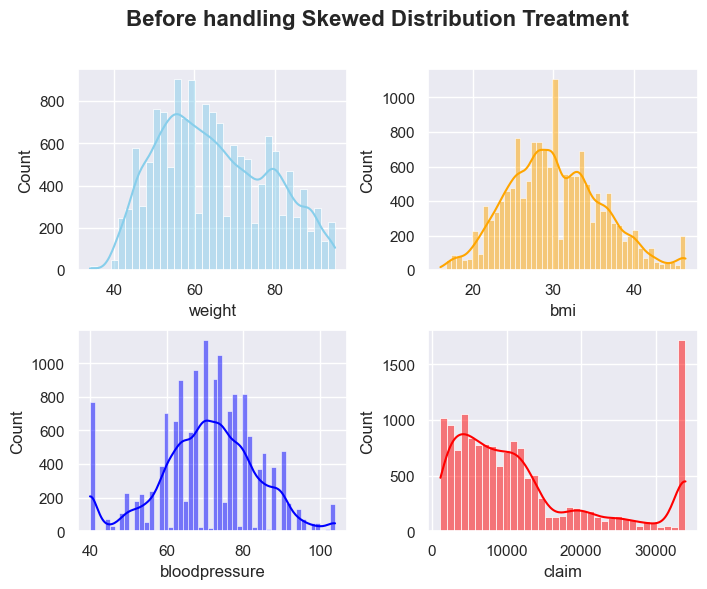

In [48]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(8, 6), sharex= False)

sns.histplot(data=df, x="weight", kde=True, ax=axs[0, 0], color='skyblue')
sns.histplot(data=df, x="bmi", kde=True, ax=axs[0, 1], color='orange')
sns.histplot(data=df, x="bloodpressure", kde=True, ax=axs[1, 0], color='blue')
sns.histplot(data=df, x="claim", kde=True, ax=axs[1, 1], color='red')

fig.suptitle("Before handling Skewed Distribution Treatment", fontsize=16, fontweight='bold')
fig.subplots_adjust(hspace= 0.3 ,wspace=0.3);

In [49]:
# Square Root Transformation 

df.weight = np.sqrt(df.weight)
df.bmi = np.sqrt(df.bmi)
df.bloodpressure = np.sqrt(df.bloodpressure)
df.claim = np.sqrt(df.claim)

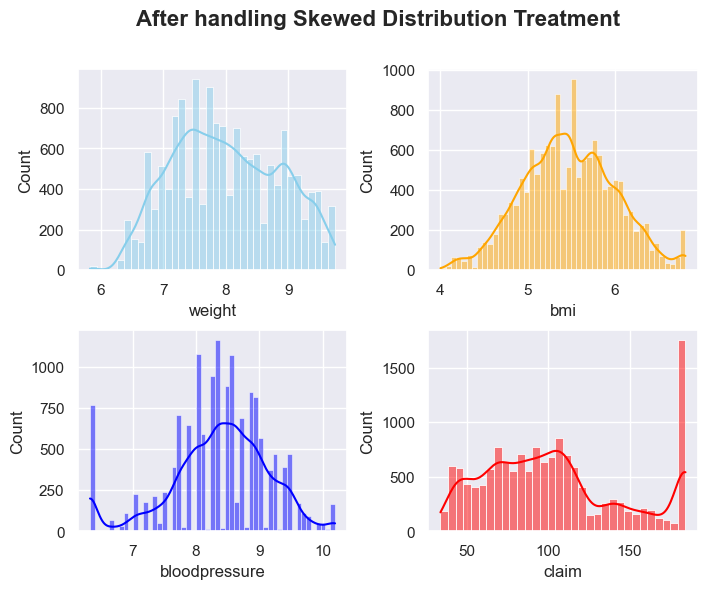

In [50]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(8, 6), sharex= False)

sns.histplot(data=df, x="weight", kde=True, ax=axs[0, 0], color='skyblue')
sns.histplot(data=df, x="bmi", kde=True, ax=axs[0, 1], color='orange')
sns.histplot(data=df, x="bloodpressure", kde=True, ax=axs[1, 0], color='blue')
sns.histplot(data=df, x="claim", kde=True, ax=axs[1, 1], color='red')

fig.suptitle("After handling Skewed Distribution Treatment", fontsize=16, fontweight='bold')
fig.subplots_adjust(hspace= 0.3 ,wspace=0.3);

## 5.6 Features Separating and Drop Unecessary Variables

🧡💚 กำหนดตัวแปรอิสระ (X) และ ตัวแปรตาม(y)

In [51]:
X = df.drop(["claim"], axis=1)
y = df["claim"]

In [52]:
X

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,sex_male,hereditary_diseases_Arthritis,...,job_title_Journalist,job_title_Labourer,job_title_Lawyer,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician
0,60.0,8.000000,4.929503,1,0,8.485281,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,49.0,8.660254,4.753946,1,0,8.831761,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,32.0,8.000000,4.219005,2,1,9.380832,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,61.0,7.280110,6.033241,1,1,8.485281,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,19.0,7.071068,4.538722,0,0,9.055385,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,7.000000,5.319774,1,1,7.348469,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14996,39.0,8.602325,5.440588,4,0,8.000000,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
14997,20.0,7.874008,5.770615,0,0,7.211103,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14998,52.0,9.380832,6.058052,0,0,8.366600,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
y

0        114.510262
1         97.811042
2        180.925952
3        184.465342
4         41.613700
            ...    
14995    145.197107
14996     86.673525
14997     37.302815
14998     95.627402
14999    161.222827
Name: claim, Length: 15000, dtype: float64

In [54]:
# --- ก่อนแบ่งข้อมูล train/test ให้เก็บชื่อ column ไว้ ---
feature_names = X.columns  # สมมติว่า X เป็น DataFrame ก่อนแบ่งข้อมูล
feature_names

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 'bloodpressure',
       'diabetes', 'regular_ex', 'sex_male', 'hereditary_diseases_Arthritis',
       ...
       'job_title_Journalist', 'job_title_Labourer', 'job_title_Lawyer',
       'job_title_Manager', 'job_title_Photographer', 'job_title_Police',
       'job_title_Politician', 'job_title_Singer', 'job_title_Student',
       'job_title_Technician'],
      dtype='object', length=142)

## 5.7 Data Normalization

In [55]:
X = StandardScaler().fit_transform(X)

In [56]:
X

array([[ 1.47892959, -0.01395376, -1.02061322, ..., -0.22844814,
        -0.31063037, -0.13867034],
       [ 0.68351375,  0.76415482, -1.34964305, ..., -0.22844814,
        -0.31063037, -0.13867034],
       [-0.54576526, -0.01395376, -2.35223078, ..., -0.22844814,
        -0.31063037, -0.13867034],
       ...,
       [-1.41349163, -0.16243532,  0.55580102, ..., -0.22844814,
        -0.31063037, -0.13867034],
       [ 0.90044535,  1.6133545 ,  1.09451655, ..., -0.22844814,
        -0.31063037, -0.13867034],
       [ 0.90044535, -0.54447333, -0.62967338, ..., -0.22844814,
        -0.31063037, -0.13867034]])

# 6. สร้างและเทรนโมเดล (Model Building and Training)

## 6.1 Splitting Dataset : 80% train set และ 20% test set

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

## 6.2 สร้างโมเดลแบบต่าง

**คำอธิบาย:  จะสร้างโมเดล 2 แบบ นั่นคือ**
*  **Linear model** ได้แก่ Multiple linear regression, Ridge, Lasso, ElasticNet
*  **Non-linear model** ได้แก่ Decision tree regression, Random forest regression

**ขั้นตอนการทำงาน:**

  1. **Nested Cross-Validation:** 
        * ทำ  nested cross-validation  เพื่อหา  hyperparameters  ที่ดีที่สุด  โดยใช้  grid search  ใน  inner loop  
        * เก็บค่า  Average R-squared (Validation Set)  จาก  outer loop 
  2. **ประเมินผล Overfitting:** 
        * train  โมเดลที่  train  ด้วย  best parameters  จาก  nested cross-validation  บน  training set  ทั้งหมด  
        * เปรียบเทียบ  R-squared   บน  training set  กับ  Average R-squared (validation set)  เพื่อเช็ค  overfitting   
        *  ถ้าโมเดลยัง  overfitting  อยู่  ให้ลองปรับ  hyperparameters  หรือเทคนิคอื่นๆ  
  3. **เลือก Best Model:**  
        *  เลือกโมเดลที่มี  Average R-squared (Validation Set)  สูงที่สุด  
  4. **Train Final Model:** 
        *  train  โมเดลที่ดีที่สุดบน  training set  ทั้งหมด  เพื่อให้ได้  final model 
  5. **ประเมินผลบน Test Set:**  
        *  ประเมินผล  final model   บน  test set  เพื่อดูประสิทธิภาพสุดท้ายกับข้อมูลใหม่ 

**คำอธิบาย:**
* model_cv: ใช้เฉพาะใน inner loop ของ nested cross-validation เพื่อหา hyperparameters ที่ดีที่สุด
* model_train: ถูกสร้างใหม่ โดยใช้ best parameters จาก model_cv แล้ว train บน training set ทั้งหมด เพื่อประเมินผลบน training set
* best_model: เก็บโมเดลที่ดีที่สุด

**Metric ที่นิยมใช้ใน Regression:**

1. **R-squared (R²):**  
      * วัดความสัมพันธ์ระหว่างค่าที่ทำนายและค่าจริง  ค่า R² ใกล้ 1  บ่งชี้ว่าแบบจำลองมีความพอดีกับข้อมูลดี  แต่ R²  อาจเพิ่มขึ้นได้  แม้ว่าจะมีการเพิ่ม  features  ที่ไม่  เกี่ยวข้องเข้าไปในแบบจำลอง 
2. **Mean Squared Error (MSE):**  
    * วัดค่าเฉลี่ยของผลต่างกำลังสองระหว่างค่าที่ทำนายและค่าจริง  ยิ่ง MSE ต่ำ  แบบจำลองยิ่งมีความแม่นยำ 
3. **Root Mean Squared Error (RMSE):**  
    * เป็นรากที่สองของ MSE  ทำให้  RMSE  มีหน่วยเดียวกับ  target variable  ซึ่งทำให้ตีความได้ง่ายขึ้น 
4. **Mean Absolute Error (MAE):**  
    * วัดค่าเฉลี่ยของความคลาดเคลื่อนสัมบูรณ์ระหว่างค่าที่ทำนายและค่าจริง  MAE  ให้ความสำคัญกับค่าผิดพลาดทุกค่าเท่าๆ กัน  ไม่เหมือน  MSE  ที่ให้ความสำคัญกับค่าผิดพลาดที่สูงกว่า 
5. **Mean Absolute Percentage Error (MAPE):**  
    * วัดค่าเฉลี่ยของเปอร์เซ็นต์ความคลาดเคลื่อนสัมบูรณ์ระหว่างค่าที่ทำนายและค่าจริง  MAPE  แสดงผลลัพธ์เป็นเปอร์เซ็นต์  ทำให้เข้าใจง่าย  แต่มีปัญหาเมื่อค่าจริงเป็นศูนย์ 

**วิธีเลือก Metric:**

- **ขึ้นอยู่กับวัตถุประสงค์ของแบบจำลอง:**  
    -  ถ้าต้องการเน้นความแม่นยำโดยรวม  ใช้  R² 
    -  ถ้าต้องการลดค่าผิดพลาดที่สูง  ใช้  RMSE 
    -  ถ้าต้องการลดค่าผิดพลาดโดยเฉลี่ย  ใช้  MAE 
    -  ถ้าข้อมูลไม่มีค่าจริงเป็นศูนย์  และต้องการ metric ที่เข้าใจง่าย  ใช้  MAPE 




### 6.2.1 Multiple Linear Regression

In [58]:
# --- Multiple Linear Regression ---
print("----- Multiple Linear Regression -----")

# ขั้นตอน (1) กำหนดโมเดล
model_lr = LinearRegression()

# ขั้นตอน (2) ไม่ต้องกำหนด parameter grid 

# ขั้นตอน (3-4)  K-Fold Cross Validation (ไม่ใช่ Nested)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

scores_r2 = cross_val_score(model_lr, X_train, y_train, cv=cv, scoring='r2')
scores_mae = cross_val_score(model_lr, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')
scores_rmse = cross_val_score(model_lr, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error')
#scores_mse = cross_val_score(model_lr, X_train, y_train, cv=cv, scoring='neg_mean_squared_error') 

# แสดงผลลัพธ์ cross-validation
print("Cross-Validation Results:")
print(f"  Average R-squared (R2): {np.mean(scores_r2):.4f}")
print(f"  Average Mean Absolute Error (MAE): {-np.mean(scores_mae):.4f}")
#print(f"  Average Mean Squared Error (MSE): {-np.mean(scores_mse):.4f}")
print(f"  Average Root Mean Squared Error (RMSE): {-np.mean(scores_rmse):.4f}")


# ขั้นตอน (5-6)  ประเมินผล Overfitting (ไม่จำเป็นสำหรับ Linear Regression เพราะ ไม่มี parameter gridไม่ต้องใช้ GridSearchCV )
# ... (Optional) 

# ขั้นตอน (7) Train Final Model
final_model_lr = model_lr
final_model_lr.fit(X_train, y_train)

# ขั้นตอน (8) ประเมินผล Final Model บน test set
y_pred_lr = final_model_lr.predict(X_test)

# ขั้นตอน (9) คำนวณ metrics
test_r2_lr = r2_score(y_test, y_pred_lr)
test_mae_lr = mean_absolute_error(y_test, y_pred_lr)
#test_mse_lr = mean_squared_error(y_test, y_pred_lr)
test_rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
test_mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)*100

# แสดงผลลัพธ์ metrics
print("\nTest Set Results:")
print(f"  R-squared (Test Set) : {test_r2_lr:.4f}")
print(f"  MAE (Test Set) : {test_mae_lr:.4f}")
#print(f"  MSE (Test Set): {test_mse_lr:.4f}")
print(f"  RMSE (Test Set) : {test_rmse_lr:.4f}")
print(f"  MAPE (Test Set): {test_mape_lr:.4f}%\n")

----- Multiple Linear Regression -----
Cross-Validation Results:
  Average R-squared (R2): 0.7357
  Average Mean Absolute Error (MAE): 14.4287
  Average Root Mean Squared Error (RMSE): 22.1675

Test Set Results:
  R-squared (Test Set) : 0.7459
  MAE (Test Set) : 14.1769
  RMSE (Test Set) : 21.7773
  MAPE (Test Set): 15.1591%



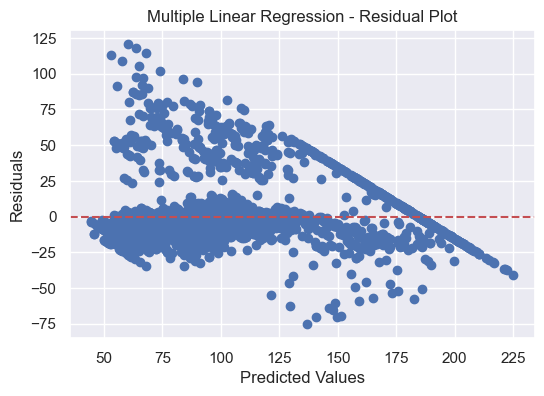

In [59]:
# --- พล็อตกราฟ Multiple Linear Regression - Residual Plot ---
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_lr, y_test - y_pred_lr) 
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Multiple Linear Regression - Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### 6.2.2 Ridge Regression

In [60]:
# --- Ridge Regression ---
print("----- Ridge Regression -----")

# ขั้นตอน (1) กำหนดโมเดล
model_ridge = Ridge(random_state=42)

# ขั้นตอน (2) กำหนด parameter grid 
param_grid_ridge = {'alpha': [0.1, 1, 10]}

# ขั้นตอน (3-4) Nested Cross-Validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)

nested_scores_ridge = []
for train_index, test_index in outer_cv.split(X, y): 
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    model_cv_ridge = GridSearchCV(model_ridge, param_grid_ridge, cv=inner_cv, scoring='r2')  
    model_cv_ridge.fit(X_train_fold, y_train_fold)

    y_pred_cv_ridge = model_cv_ridge.predict(X_test_fold)
    r2_ridge = r2_score(y_test_fold, y_pred_cv_ridge)
    nested_scores_ridge.append(r2_ridge)

# ขั้นตอน (5) เก็บผลลัพธ์ nested cross-validation
results_ridge = {
    'cv_r2': np.mean(nested_scores_ridge),
    'best_params': model_cv_ridge.best_params_,
    'best_model': model_cv_ridge.best_estimator_
}

# แสดงผลลัพธ์ nested cross-validation
print(f"Best Parameters: {results_ridge['best_params']}\n")
print("Nested Cross-Validation R2 scores:", nested_scores_ridge)
print(f"Average R2 (Validation Set): {results_ridge['cv_r2']:.4f}\n")

#  ขั้นตอน (6) ประเมินผล Overfitting
model_train_ridge = Ridge(**results_ridge['best_params'], random_state=42)
model_train_ridge.fit(X_train, y_train)

y_pred_train_ridge = model_train_ridge.predict(X_train)
train_r2_ridge = r2_score(y_train, y_pred_train_ridge)
print(f"R-squared (Training Set): {train_r2_ridge:.4f}")
print(f"R-squared diff: {train_r2_ridge - results_ridge['cv_r2']:.4f}\n")

#  ขั้นตอน (7)Train Final Model
final_model_ridge = results_ridge['best_model']
final_model_ridge.fit(X_train, y_train)

# ขั้นตอน (8) ประเมินผล Final Model บน test set
y_pred_ridge = final_model_ridge.predict(X_test)

# ขั้นตอน (9) คำนวณ metrics
test_r2_ridge = r2_score(y_test, y_pred_ridge)
test_mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
test_rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
test_mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)*100

#  แสดงผลลัพธ์ metrics
print("\nTest Set Results:")
print(f"  R-squared (Test Set): {test_r2_ridge:.4f}")
print(f"  MAE (Test Set): {test_mae_ridge:.4f}")
print(f"  RMSE (Test Set): {test_rmse_ridge:.4f}")
print(f"  MAPE (Test Set): {test_mape_ridge:.4f}%\n")

----- Ridge Regression -----
Best Parameters: {'alpha': 10}

Nested Cross-Validation R2 scores: [0.7315700050328549, 0.7277027323075539, 0.7420900840318014, 0.7465335066828429, 0.7465033254591547]
Average R2 (Validation Set): 0.7389

R-squared (Training Set): 0.7435
R-squared diff: 0.0046


Test Set Results:
  R-squared (Test Set): 0.7459
  MAE (Test Set): 14.1808
  RMSE (Test Set): 21.7771
  MAPE (Test Set): 15.1720%



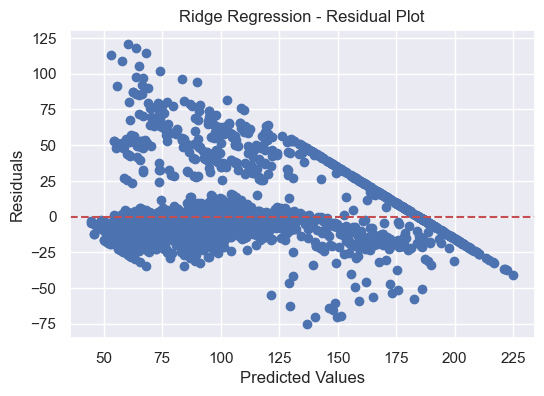

In [61]:
# --- พล็อตกราฟ Ridge Regression - Residual Plot ---
plt.figure(figsize=(6,4 ))
plt.scatter(y_pred_ridge, y_test - y_pred_ridge)  # แก้ไขตรงนี้
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Ridge Regression - Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### 6.2.3 Lasso Regression

* Lasso Regression ใช้ L1 regularization ซึ่งมีแนวโน้มทำให้ coefficients บางตัวเป็นศูนย์ ช่วยในการเลือก feature

In [62]:
# --- Lasso Regression ---
print("----- Lasso Regression -----")

# ขั้นตอน (1) กำหนดโมเดล
model_lasso = Lasso(random_state=42)

# ขั้นตอน (2) กำหนด parameter grid 
param_grid_lasso = {'alpha': [0.1, 1, 10]}

# ขั้นตอน (3-4) Nested Cross-Validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)

nested_scores_lasso = []
for train_index, test_index in outer_cv.split(X, y): 
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    model_cv_lasso = GridSearchCV(model_lasso, param_grid_lasso, cv=inner_cv, scoring='r2')  
    model_cv_lasso.fit(X_train_fold, y_train_fold)

    y_pred_cv_lasso = model_cv_lasso.predict(X_test_fold)
    r2_lasso = r2_score(y_test_fold, y_pred_cv_lasso)
    nested_scores_lasso.append(r2_lasso)

# ขั้นตอน (5) เก็บผลลัพธ์ nested cross-validation
results_lasso = {
    'cv_r2': np.mean(nested_scores_lasso),
    'best_params': model_cv_lasso.best_params_,
    'best_model': model_cv_lasso.best_estimator_
}

# แสดงผลลัพธ์ nested cross-validation
print(f"Best Parameters: {results_lasso['best_params']}\n")
print("Nested Cross-Validation R2 scores:", nested_scores_lasso)
print(f"Average R2 (Validation Set): {results_lasso['cv_r2']:.4f}\n")

#  ขั้นตอน (6) ประเมินผล Overfitting
model_train_lasso = Lasso(**results_lasso['best_params'], random_state=42)
model_train_lasso.fit(X_train, y_train)

y_pred_train_lasso = model_train_lasso.predict(X_train)
train_r2_lasso = r2_score(y_train, y_pred_train_lasso)
print(f"R-squared (Training Set): {train_r2_lasso:.4f}")
print(f"R-squared diff: {train_r2_lasso - results_lasso['cv_r2']:.4f}\n")

#  ขั้นตอน (7)Train Final Model
final_model_lasso = results_lasso['best_model']
final_model_lasso.fit(X_train, y_train)

# ขั้นตอน (8) ประเมินผล Final Model บน test set
y_pred_lasso = final_model_lasso.predict(X_test)

# ขั้นตอน (9) คำนวณ metrics
test_r2_lasso = r2_score(y_test, y_pred_lasso)
test_mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
test_rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
test_mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)*100

#  แสดงผลลัพธ์ metrics
print("\nTest Set Results:")
print(f"  R-squared (Test Set): {test_r2_lasso:.4f}")
print(f"  MAE (Test Set): {test_mae_lasso:.4f}")
print(f"  RMSE (Test Set): {test_rmse_lasso:.4f}")
print(f"  MAPE (Test Set): {test_mape_lasso:.4f}%\n")

----- Lasso Regression -----
Best Parameters: {'alpha': 0.1}

Nested Cross-Validation R2 scores: [0.7328566222410042, 0.7277070309216191, 0.7432906458958756, 0.7477800588212873, 0.7463649275628422]
Average R2 (Validation Set): 0.7396

R-squared (Training Set): 0.7426
R-squared diff: 0.0030


Test Set Results:
  R-squared (Test Set): 0.7466
  MAE (Test Set): 14.0462
  RMSE (Test Set): 21.7446
  MAPE (Test Set): 15.0804%



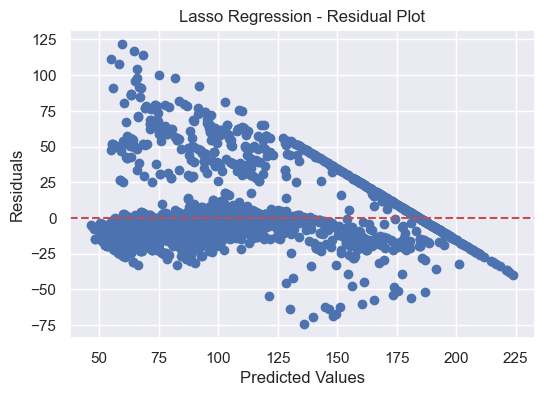

In [63]:
# --- พล็อตกราฟ Lasso Regression - Residual Plot ---
plt.figure(figsize=(6,4 ))
plt.scatter(y_pred_lasso, y_test - y_pred_lasso)  # แก้ไขตรงนี้
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Lasso Regression - Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### 6.2.4 Elastic Net

**พารามิเตอร์ของ ElasticNet**

`l1_ratio`  ใน ElasticNet เป็น hyperparameter ที่ควบคุมสัดส่วนของ L1 regularization (Lasso) และ L2 regularization (Ridge) ในโมเดล 

**ค่าที่เป็นไปได้:**

* **0:** ใช้ L2 regularization เท่านั้น  เหมือนกับ Ridge regression
* **1:** ใช้ L1 regularization เท่านั้น  เหมือนกับ Lasso regression
* **ระหว่าง 0 ถึง 1:**  ใช้ทั้ง L1 และ L2 regularization   โดยค่า  `l1_ratio`  กำหนดสัดส่วน  เช่น  `l1_ratio=0.5`  หมายถึงใช้ L1 50%  และ L2 50% 

**ผลกระทบของ l1_ratio:**

* **l1_ratio ใกล้ 0:**  โมเดลมีแนวโน้มคล้าย Ridge  ลดน้ำหนักของ coefficients  แต่ไม่ทำให้เป็น  0 
* **l1_ratio ใกล้ 1:**  โมเดลมีแนวโน้มคล้าย Lasso  เลือก features  ที่สำคัญ  และทำให้ coefficients  ของ  features  ที่ไม่สำคัญเป็น  0  (feature selection)
* **l1_ratio ระหว่าง 0 ถึง 1:**  โมเดลผสมผสานข้อดีของ Ridge และ Lasso  

In [64]:
# --- ElasticNet Regression ---
print("----- ElasticNet Regression -----")

# ขั้นตอน (1) กำหนดโมเดล
model_elasticnet = ElasticNet(random_state=42)

# ขั้นตอน (2) กำหนด parameter grid 
param_grid_elasticnet = {
    'alpha': [0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9]  # เพิ่ม l1_ratio สำหรับ ElasticNet
}

# ขั้นตอน (3-4) Nested Cross-Validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)

nested_scores_elasticnet = []
for train_index, test_index in outer_cv.split(X, y): 
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    model_cv_elasticnet = GridSearchCV(model_elasticnet, param_grid_elasticnet, cv=inner_cv, scoring='r2')  
    model_cv_elasticnet.fit(X_train_fold, y_train_fold)

    y_pred_cv_elasticnet = model_cv_elasticnet.predict(X_test_fold)
    r2_elasticnet = r2_score(y_test_fold, y_pred_cv_elasticnet)
    nested_scores_elasticnet.append(r2_elasticnet)

# ขั้นตอน (5) เก็บผลลัพธ์ nested cross-validation
results_elasticnet = {
    'cv_r2': np.mean(nested_scores_elasticnet),
    'best_params': model_cv_elasticnet.best_params_,
    'best_model': model_cv_elasticnet.best_estimator_
}

# แสดงผลลัพธ์ nested cross-validation
print(f"Best Parameters: {results_elasticnet['best_params']}\n")
print("Nested Cross-Validation R2 scores:", nested_scores_elasticnet)
print(f"Average R2 (Validation Set): {results_elasticnet['cv_r2']:.4f}\n")

#  ขั้นตอน (6) ประเมินผล Overfitting
model_train_elasticnet = ElasticNet(**results_elasticnet['best_params'], random_state=42)
model_train_elasticnet.fit(X_train, y_train)

y_pred_train_elasticnet = model_train_elasticnet.predict(X_train)
train_r2_elasticnet = r2_score(y_train, y_pred_train_elasticnet)
print(f"R-squared (Training Set): {train_r2_elasticnet:.4f}")
print(f"R-squared diff: {train_r2_elasticnet - results_elasticnet['cv_r2']:.4f}\n")

#  ขั้นตอน (7) Train Final Model
final_model_elasticnet = results_elasticnet['best_model']
final_model_elasticnet.fit(X_train, y_train)

# ขั้นตอน (8) ประเมินผล Final Model บน test set
y_pred_elasticnet = final_model_elasticnet.predict(X_test)

# ขั้นตอน (9) คำนวณ metrics
test_r2_elasticnet = r2_score(y_test, y_pred_elasticnet)
test_mae_elasticnet = mean_absolute_error(y_test, y_pred_elasticnet)
test_rmse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet, squared=False)
test_mape_elasticnet = mean_absolute_percentage_error(y_test, y_pred_elasticnet)*100

#  แสดงผลลัพธ์ metrics
print("\nTest Set Results:")
print(f"  R-squared (Test Set): {test_r2_elasticnet:.4f}")
print(f"  MAE (Test Set): {test_mae_elasticnet:.4f}")
print(f"  RMSE (Test Set): {test_rmse_elasticnet:.4f}")
print(f"  MAPE (Test Set): {test_mape_elasticnet:.4f}%\n")

----- ElasticNet Regression -----
Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.9}

Nested Cross-Validation R2 scores: [0.7326785622221687, 0.7275190486571268, 0.7428943002313451, 0.7475707676583669, 0.7460709450548628]
Average R2 (Validation Set): 0.7393

R-squared (Training Set): 0.7424
R-squared diff: 0.0031


Test Set Results:
  R-squared (Test Set): 0.7462
  MAE (Test Set): 14.1185
  RMSE (Test Set): 21.7612
  MAPE (Test Set): 15.2511%



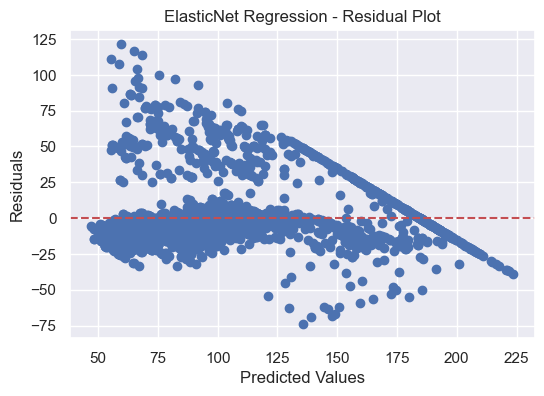

In [65]:
# --- พล็อตกราฟ Residual Plot - ElasticNet Regression --- 
# แสดงความสัมพันธ์ระหว่างค่าที่ทำนายและ residuals

plt.figure(figsize=(6, 4))
plt.scatter(y_pred_elasticnet, y_test - y_pred_elasticnet)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("ElasticNet Regression - Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

####  ความหมายของกราฟ Residual Plot

* กราฟ Residual Plot แสดงให้เห็นว่า Linear Model อาจจะ **ไม่เหมาะสม** กับข้อมูล  
* และยังชี้ให้เห็นว่า **มีความสัมพันธ์แบบ non-linear** ระหว่าง features และ target variable  
* **รูปแบบที่ไม่สุ่มของ residuals:**   Residuals  ไม่ได้กระจายแบบสุ่มรอบเส้นแนวนอนที่  0 (เส้นสีแดง)   แต่กลับมี **แนวโน้มลดลง**   เมื่อ  predicted values  เพิ่มขึ้น  รูปแบบนี้บ่งชี้ว่า linear model ไม่สามารถจับความสัมพันธ์ในข้อมูลได้ดี   
*  ความแปรปรวนของ  residuals  ไม่คงที่  เพราะค่า Residuals  มีการกระจายตัวกว้าง  เมื่อ  predicted values  ต่ำ  และแคบลง  เมื่อ  predicted values  สูงขึ้น  
    บ่งชี้ว่า  linear model  อาจจะทำนาย  claim amount  ได้ไม่แม่นยำเท่ากันในทุกช่วงค่า  


### 🧡💖 เมื่อพิจาณาจาก R-squared บน test set  , ความสัมพันธ์ของตัวแปร (Correlation), กราฟ Pairplot และ กราฟ Residual Plot  
* แสดงให้เห็นว่า linear model อาจจะไม่เหมาะสมกับข้อมูล  
* และบ่งชี้ว่าข้อมูลมีความสัมพันธ์แบบ  non-linear  ที่ต้องใช้โมเดลที่ซับซ้อนมาเพื่อปรับปรุงประสิทธิภาพการทำนาย
* โดยจะใช้ Decision tree l, Random forest model ในการสร้างโมเดลทำนาย

### 6.2.5 Decision Tree Regression

In [66]:
# --- Decision Tree Regression ---
print("----- Decision Tree Regression -----")

# ขั้นตอน (1) กำหนดโมเดล
model_dt = DecisionTreeRegressor(random_state=2)

# ขั้นตอน (2) กำหนด parameter grid 
param_grid_dt = {
    'max_depth': [7, 10, 12],
    'min_samples_split': [30,35,40],
    'min_samples_leaf': [ 4, 7, 9]
}

# ขั้นตอน (3-4) Nested Cross-Validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=2)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=2)

nested_scores_dt = []
for train_index, test_index in outer_cv.split(X, y): 
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    model_cv_dt = GridSearchCV(model_dt, param_grid_dt, cv=inner_cv, scoring='r2')  
    model_cv_dt.fit(X_train_fold, y_train_fold)

    y_pred_cv_dt = model_cv_dt.predict(X_test_fold)
    r2_dt = r2_score(y_test_fold, y_pred_cv_dt)
    nested_scores_dt.append(r2_dt)

# ขั้นตอน (5) เก็บผลลัพธ์ nested cross-validation
results_dt = {
    'cv_r2': np.mean(nested_scores_dt),
    'best_params': model_cv_dt.best_params_,
    'best_model': model_cv_dt.best_estimator_
}

# แสดงผลลัพธ์ nested cross-validation
print(f"Best Parameters: {results_dt['best_params']}\n")
print("Nested Cross-Validation R2 scores:", nested_scores_dt)
print(f"Average R2 (Validation Set): {results_dt['cv_r2']:.4f}\n")

#  ขั้นตอน (6) ประเมินผล Overfitting
model_train_dt = DecisionTreeRegressor(**results_dt['best_params'], random_state=2)
model_train_dt.fit(X_train, y_train)

y_pred_train_dt = model_train_dt.predict(X_train)
train_r2_dt = r2_score(y_train, y_pred_train_dt)
print(f"R-squared (Training Set): {train_r2_dt:.4f}")
print(f"R-squared diff: {train_r2_dt - results_dt['cv_r2']:.4f}\n")

#  ขั้นตอน (7) Train Final Model
final_model_dt = results_dt['best_model']
final_model_dt.fit(X_train, y_train)

# ขั้นตอน (8) ประเมินผล Final Model บน test set
y_pred_dt = final_model_dt.predict(X_test)

# ขั้นตอน (9) คำนวณ metrics
test_r2_dt = r2_score(y_test, y_pred_dt)
test_mae_dt = mean_absolute_error(y_test, y_pred_dt)
test_rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
test_mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)*100

#  แสดงผลลัพธ์ metrics
print("\nTest Set Results:")
print(f"  R-squared (Test Set): {test_r2_dt:.4f}")
print(f"  MAE (Test Set): {test_mae_dt:.4f}")
print(f"  RMSE (Test Set): {test_rmse_dt:.4f}")
print(f"  MAPE (Test Set): {test_mape_dt:.4f}%\n")

----- Decision Tree Regression -----
Best Parameters: {'max_depth': 12, 'min_samples_leaf': 7, 'min_samples_split': 30}

Nested Cross-Validation R2 scores: [0.9091685385176254, 0.9100410650072487, 0.9069630069502227, 0.922592169407088, 0.9150230117987874]
Average R2 (Validation Set): 0.9128

R-squared (Training Set): 0.9338
R-squared diff: 0.0211


Test Set Results:
  R-squared (Test Set): 0.9012
  MAE (Test Set): 5.7359
  RMSE (Test Set): 13.5775
  MAPE (Test Set): 6.0355%



### 6.2.6 Random Forest Regression

In [67]:
# --- Random Forest Regression ---
print("----- Random Forest Regression -----")

# ขั้นตอน (1) กำหนดโมเดล
model_rf = RandomForestRegressor(random_state=2)

# ขั้นตอน (2) กำหนด parameter grid 
param_grid_rf = {
    'n_estimators': [100,150, 200], 
    'max_depth': [7, 10, 12],
    'min_samples_split': [25, 30,35],
    'min_samples_leaf': [4, 5, 7]
}

# ขั้นตอน (3-4) Nested Cross-Validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=2)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=2)

nested_scores_rf = []
for train_index, test_index in outer_cv.split(X, y): 
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    model_cv_rf = GridSearchCV(model_rf, param_grid_rf, cv=inner_cv, scoring='r2')  
    model_cv_rf.fit(X_train_fold, y_train_fold)

    y_pred_cv_rf = model_cv_rf.predict(X_test_fold)
    r2_rf = r2_score(y_test_fold, y_pred_cv_rf)
    nested_scores_rf.append(r2_rf)

# ขั้นตอน (5) เก็บผลลัพธ์ nested cross-validation
results_rf = {
    'cv_r2': np.mean(nested_scores_rf),
    'best_params': model_cv_rf.best_params_,
    'best_model': model_cv_rf.best_estimator_
}

# แสดงผลลัพธ์ nested cross-validation
print(f"Best Parameters: {results_rf['best_params']}\n")
print("Nested Cross-Validation R2 scores:", nested_scores_rf)
print(f"Average R2 (Validation Set): {results_rf['cv_r2']:.4f}\n")

#  ขั้นตอน (6) ประเมินผล Overfitting
model_train_rf = RandomForestRegressor(**results_rf['best_params'], random_state=2)
model_train_rf.fit(X_train, y_train)

y_pred_train_rf = model_train_rf.predict(X_train)
train_r2_rf = r2_score(y_train, y_pred_train_rf)
print(f"R-squared (Training Set): {train_r2_rf:.4f}")
print(f"R-squared diff: {train_r2_rf - results_rf['cv_r2']:.4f}\n")

#  ขั้นตอน (7) Train Final Model
final_model_rf = results_rf['best_model']
final_model_rf.fit(X_train, y_train)

# ขั้นตอน (8) ประเมินผล Final Model บน test set
y_pred_rf = final_model_rf.predict(X_test)

# ขั้นตอน (9) คำนวณ metrics
test_r2_rf = r2_score(y_test, y_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_pred_rf)
test_rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
test_mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)*100

#  แสดงผลลัพธ์ metrics
print("\nTest Set Results:")
print(f"  R-squared (Test Set): {test_r2_rf:.4f}")
print(f"  MAE (Test Set): {test_mae_rf:.4f}")
print(f"  RMSE (Test Set): {test_rmse_rf:.4f}")
print(f"  MAPE (Test Set): {test_mape_rf:.4f}%\n")

----- Random Forest Regression -----
Best Parameters: {'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 25, 'n_estimators': 100}

Nested Cross-Validation R2 scores: [0.9304614203270081, 0.9275878390509127, 0.9256547919195619, 0.9366567993308675, 0.9339031132221711]
Average R2 (Validation Set): 0.9309

R-squared (Training Set): 0.9482
R-squared diff: 0.0173


Test Set Results:
  R-squared (Test Set): 0.9241
  MAE (Test Set): 5.3987
  RMSE (Test Set): 11.9029
  MAPE (Test Set): 5.6379%



## 6.3 เลือก Best Model

### 6.3.1 แสดงผลลัพธ์ metrics ของแต่ละโมเดล

In [68]:
# แสดงผลลัพธ์ metrics  ---  Multiple Linear Regression  ---
print("----- Multiple Linear Regression -----")
print("\nTest Set Results:")
print(f"  R-squared (Test Set) : {test_r2_lr:.4f}")
print(f"  MAE (Test Set) : {test_mae_lr:.4f}")
print(f"  RMSE (Test Set) : {test_rmse_lr:.4f}")
print(f"  MAPE (Test Set): {test_mape_lr:.4f}%\n")

# แสดงผลลัพธ์ metrics  ---   Ridge Regression   ---
print("----- Ridge Regression -----")
print("\nTest Set Results:")
print(f"  R-squared (Test Set): {test_r2_ridge:.4f}")
print(f"  MAE (Test Set): {test_mae_ridge:.4f}")
print(f"  RMSE (Test Set): {test_rmse_ridge:.4f}")
print(f"  MAPE (Test Set): {test_mape_ridge:.4f}%\n")

# แสดงผลลัพธ์ metrics  ---   Lasso Regression   ---
print("----- Lasso Regression -----")
print("\nTest Set Results:")
print(f"  R-squared (Test Set): {test_r2_lasso:.4f}")
print(f"  MAE (Test Set): {test_mae_lasso:.4f}")
print(f"  RMSE (Test Set): {test_rmse_lasso:.4f}")
print(f"  MAPE (Test Set): {test_mape_lasso:.4f}%\n")

# แสดงผลลัพธ์ metrics  ---   ElasticNet Regression   ---
print("----- ElasticNet Regression -----")
print("\nTest Set Results:")
print(f"  R-squared (Test Set): {test_r2_elasticnet:.4f}")
print(f"  MAE (Test Set): {test_mae_elasticnet:.4f}")
print(f"  RMSE (Test Set): {test_rmse_elasticnet:.4f}")
print(f"  MAPE (Test Set): {test_mape_elasticnet:.4f}%\n")

# แสดงผลลัพธ์ metrics  ---   Decision Tree  ---
print("----- Decision Tree Regression -----")
print("\nTest Set Results:")
print(f"  R-squared (Test Set): {test_r2_dt:.4f}")
print(f"  MAE (Test Set): {test_mae_dt:.4f}")
print(f"  RMSE (Test Set): {test_rmse_dt:.4f}")
print(f"  MAPE (Test Set): {test_mape_dt:.4f}%\n")

# แสดงผลลัพธ์ metrics  ---  Random Forest Regression  ---
print("----- Random Forest Regression -----")
print("\nTest Set Results:")
print(f"  R-squared (Test Set): {test_r2_rf:.4f}")
print(f"  MAE (Test Set): {test_mae_rf:.4f}")
print(f"  RMSE (Test Set): {test_rmse_rf:.4f}")
print(f"  MAPE (Test Set): {test_mape_rf:.4f}%\n")

----- Multiple Linear Regression -----

Test Set Results:
  R-squared (Test Set) : 0.7459
  MAE (Test Set) : 14.1769
  RMSE (Test Set) : 21.7773
  MAPE (Test Set): 15.1591%

----- Ridge Regression -----

Test Set Results:
  R-squared (Test Set): 0.7459
  MAE (Test Set): 14.1808
  RMSE (Test Set): 21.7771
  MAPE (Test Set): 15.1720%

----- Lasso Regression -----

Test Set Results:
  R-squared (Test Set): 0.7466
  MAE (Test Set): 14.0462
  RMSE (Test Set): 21.7446
  MAPE (Test Set): 15.0804%

----- ElasticNet Regression -----

Test Set Results:
  R-squared (Test Set): 0.7462
  MAE (Test Set): 14.1185
  RMSE (Test Set): 21.7612
  MAPE (Test Set): 15.2511%

----- Decision Tree Regression -----

Test Set Results:
  R-squared (Test Set): 0.9012
  MAE (Test Set): 5.7359
  RMSE (Test Set): 13.5775
  MAPE (Test Set): 6.0355%

----- Random Forest Regression -----

Test Set Results:
  R-squared (Test Set): 0.9241
  MAE (Test Set): 5.3987
  RMSE (Test Set): 11.9029
  MAPE (Test Set): 5.6379%



### 6.3.2 แสดงกราฟเปรียบเทียบค่า MAPE ของแต่ละโมเดล

**Mean Absolute Percentage Error (MAPE):**
* วัดค่าเฉลี่ยของเปอร์เซ็นต์ความคลาดเคลื่อนสัมบูรณ์ระหว่างค่าที่ทำนายและค่าจริง  
* MAPE  แสดงผลลัพธ์เป็นเปอร์เซ็นต์  ทำให้เข้าใจง่าย
* แสดงผล MAPE ในรูปแบบกราฟแท่ง (bar chart) เพื่อเปรียบเทียบ MAPE ของแต่ละโมเดล

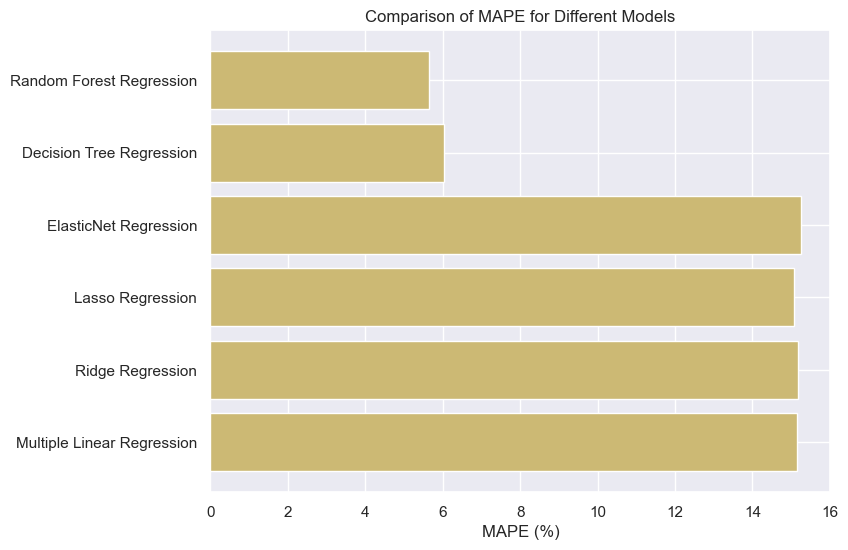

In [69]:
models = ['Multiple Linear Regression', 'Ridge Regression', 'Lasso Regression', 
                'ElasticNet Regression', 'Decision Tree Regression', 'Random Forest Regression']
mape_values = [15.1591, 15.1720, 15.0804, 15.2511, 6.0355, 5.6379]

plt.figure(figsize=(8, 6))  
plt.barh(models, mape_values, color='y' )  
plt.xlabel('MAPE (%)')        
#plt.ylabel('Model')
plt.title('Comparison of MAPE for Different Models')
plt.show()

กราฟนี้แสดงการเปรียบเทียบค่า MAPE (Mean Absolute Percentage Error) ของโมเดลการทำนายแบบ Regression ที่แตกต่างกัน 6 โมเดล ได้แก่:

1. Multiple Linear Regression
2. Ridge Regression
3. Lasso Regression
4. ElasticNet Regression
5. Decision Tree Regression
6. Random Forest Regression

จากกราฟ จะเห็นได้ว่า **Random Forest Regression** มีค่า MAPE น้อยที่สุด (ประมาณ 5.64%)  รองลงมาคือ Decision Tree Regression (ประมาณ 6.04%)  

ส่วนโมเดลที่เหลือ (Multiple Linear Regression, Ridge Regression, Lasso Regression, ElasticNet Regression) มีค่า MAPE ใกล้เคียงกัน  อยู่ที่ประมาณ 15%  ซึ่งสูงกว่า  Random Forest  และ  Decision Tree  มาก

**✅สรุป:**

โมเดล **Random Forest Regression** เหมาะสมที่สุดสำหรับการทำนายในกรณีนี้  เนื่องจากมีค่า MAPE น้อยที่สุด  หมายความว่ามีความแม่นยำในการทำนายสูงกว่าโมเดลอื่นๆ  




### 6.3.3 Feature Importance for Random Forest 

Top 15 Feature ranking (Random Forest):
  1. feature smoker (0.550392)
  2. feature age (0.244164)
  3. feature bmi (0.049026)
  4. feature weight (0.022433)
  5. feature hereditary_diseases_NoDisease (0.020415)
  6. feature no_of_dependents (0.019633)
  7. feature bloodpressure (0.015619)
  8. feature job_title_Photographer (0.010291)
  9. feature diabetes (0.009408)
  10. feature regular_ex (0.005560)
  11. feature job_title_FilmMaker (0.005010)
  12. feature sex_male (0.004601)
  13. feature job_title_HomeMakers (0.004409)
  14. feature job_title_Manager (0.004389)
  15. feature job_title_HouseKeeper (0.003344)


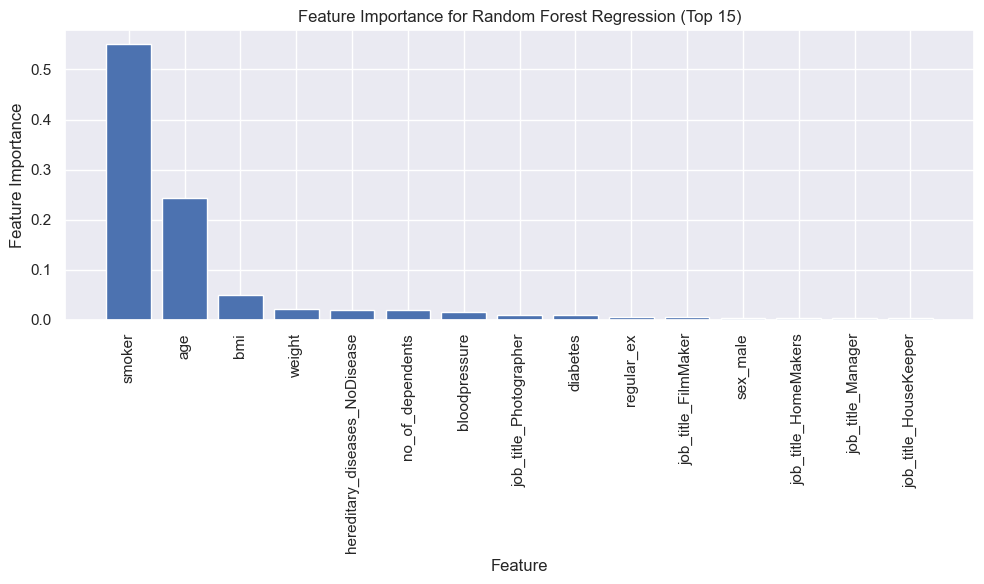

In [82]:
# เรียงลำดับ feature importance จากมากไปน้อย
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# พิมพ์ Feature ranking
print("Top 15 Feature ranking (Random Forest):")
for i in range(15):  # 15 อันดับแรก
    print(f"  {i+1}. feature {sorted_features[i]} ({sorted_importances[i]:.6f})")

# เลือกเฉพาะ 15 อันดับแรก
top_15_features = sorted_features[:15]
top_15_importances = sorted_importances[:15]

# พล็อตกราฟ bar chart สำหรับ 15 อันดับแรก
plt.figure(figsize=(10, 6))  
plt.bar(top_15_features, top_15_importances)
plt.ylabel("Feature Importance")
plt.xlabel("Feature")
plt.title("Feature Importance for Random Forest Regression (Top 15)")
plt.xticks(rotation=90)  # หมุน labels ของแกน x 90 องศา
plt.tight_layout() 
plt.show()

กราฟนี้แสดงถึงความสำคัญของตัวแปรต่างๆ (Features) ที่ใช้ในการทำนายผลลัพธ์ด้วยโมเดล Random Forest Regression โดยแสดงเฉพาะ 15 อันดับแรกที่มีผลมากที่สุดต่อการทำนาย 

**สรุปผลจากกราฟ**

* **Smoker:** เป็นตัวแปรที่มีความสำคัญมากที่สุดในการทำนายผลลัพธ์  โดยมีค่า Feature Importance สูงกว่าตัวแปรอื่นๆ อย่างเห็นได้ชัด 
* **Age:** เป็นตัวแปรที่มีความสำคัญรองลงมา แสดงว่าอายุของผู้ถือกรมธรรม์มีผลต่อการทำนายค่าสินไหม 
* **BMI:**  มีความสำคัญในระดับหนึ่ง  
* **Weight, hereditary_diseases_NoDisease:** มีความสำคัญลดหลั่นลงมา
* **ตัวแปรอื่นๆ:**  ที่เหลือ มีความสำคัญค่อนข้างน้อย  โดยบางตัวแปรแทบไม่มีผลต่อการทำนายเลย

**ข้อสังเกต:**

* ตัวแปรที่เกี่ยวข้องกับการสูบบุหรี่ (Smoker) มีอิทธิพลต่อการทำนายมากที่สุด  ซึ่งสอดคล้องกับความเข้าใจทั่วไปที่ว่าการสูบบุหรี่ส่งผลเสียต่อสุขภาพ  และอาจนำไปสู่ค่าใช้จ่ายด้านสุขภาพที่สูงขึ้น
* อายุ (Age) และดัชนีมวลกาย (BMI) เป็นปัจจัยสำคัญรองลงมา  ซึ่งสอดคล้องกับความเสี่ยงด้านสุขภาพที่เพิ่มขึ้นตามอายุ และภาวะน้ำหนักเกิน

**ประโยชน์ของ Feature Importance:**

* ช่วยให้เข้าใจว่าโมเดลให้ความสำคัญกับตัวแปรใดมากที่สุด
* เป็นแนวทางในการปรับปรุงโมเดล  เช่น  การสร้างตัวแปรใหม่ที่เกี่ยวข้องกับตัวแปรที่มีความสำคัญสูง 
* ช่วยลดความซับซ้อนของโมเดล  โดยพิจารณาตัดตัวแปรที่ไม่มีความสำคัญออก


# 7.ดึงโมเดลออกไปใช้งาน 💛💖

## 7.1 การบันทึกโมเดล Random Forest Classifier

In [83]:
# บันทึกโมเดลที่ดีที่สุดด้วย pickle  
#โมเดลชื่อว่า final_model_rf

import pickle
filename =' Health_Insurance_Claim_Prediction.pkl'
pickle.dump(final_model_rf, open(filename, 'wb'))

### การโหลดโมเดลกลับมาใช้ 

filename = 'Health_Insurance_Claim_Prediction.sav'
loaded_model = pickle.load(open(filename, 'rb'))

###  วิธีทำนายค่าประกันสุขภาพที่ผู้ถือกรมธรรม์เรียกร้อง(Claim Amount)

#### ทำนายค่า
- Health_Insurance_Claim_Prediction = loaded_model.predict(new_data)
- โดย new_data ต้องผ่านการทำ Data processing มาแล้ว

#### แสดงผลลัพธ์
- print("Predictions:", Health_Insurance_Claim_Prediction)